In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/home/l2-48/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Class Proportions:
Non_Monkeypox: 619 Monkeypox: 697


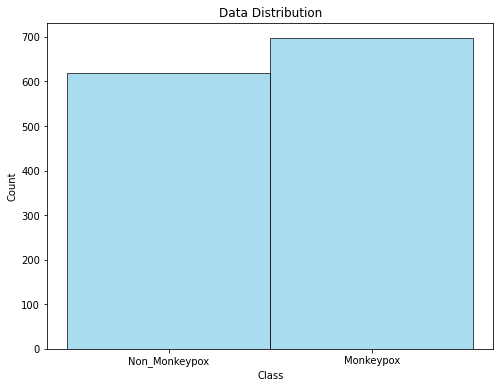

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-48/Downloads/Arvind/s/1325_images"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Monkeypox and Non_Monkeypox)
for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Non_Monkeypox, 1 for Monkeypox) to the labels list
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Non_Monkeypox:", np.sum(labels == 0), "Monkeypox:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


In [ ]:
# Balance the dataset with 600 images from each class (Non_Monkeypox and Monkeypox)
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

# Concatenate the data back together
balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Non_Monkeypox Images:", non_monkeypox_images.shape)
print("Monkeypox Images:", monkeypox_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Non_Monkeypox Images: (600, 224, 224)
Monkeypox Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


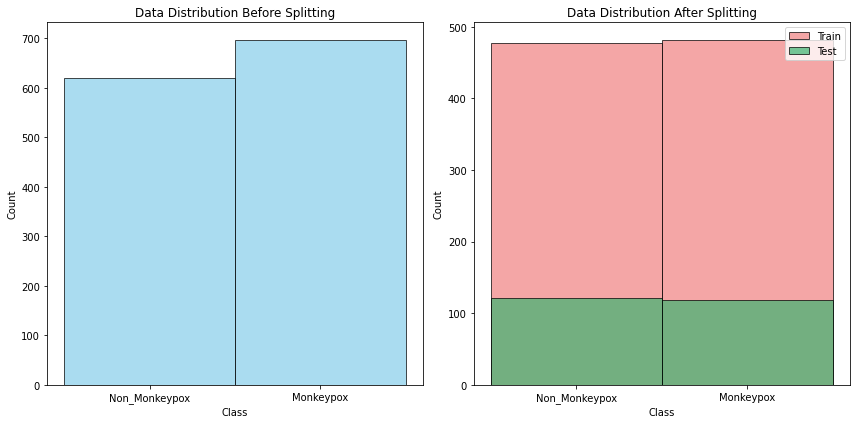

In [ ]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))

# Before splitting (Original data)
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# After splitting (Train and Test sets)
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

def check_dataset_balance(labels):
    # Count the occurrences of each class label
    label_counts = Counter(labels)

    # Print the counts for each class
    print("Class distribution in the dataset:")
    for label, count in label_counts.items():
        class_name = "Monkeypox" if label == 1 else "Non_Monkeypox"
        print(f"{class_name}: {count} images")

    # Check if the dataset is balanced
    counts = list(label_counts.values())
    min_count = min(counts)
    max_count = max(counts)

    is_balanced = min_count == max_count

    if is_balanced:
        print("The dataset is balanced.")
    else:
        print("The dataset is not balanced.")
        print(f"Minimum count: {min_count}, Maximum count: {max_count}")

# Call the function with balanced_labels
check_dataset_balance(balanced_labels)


Class distribution in the dataset:
Non_Monkeypox: 600 images
Monkeypox: 600 images
The dataset is balanced.


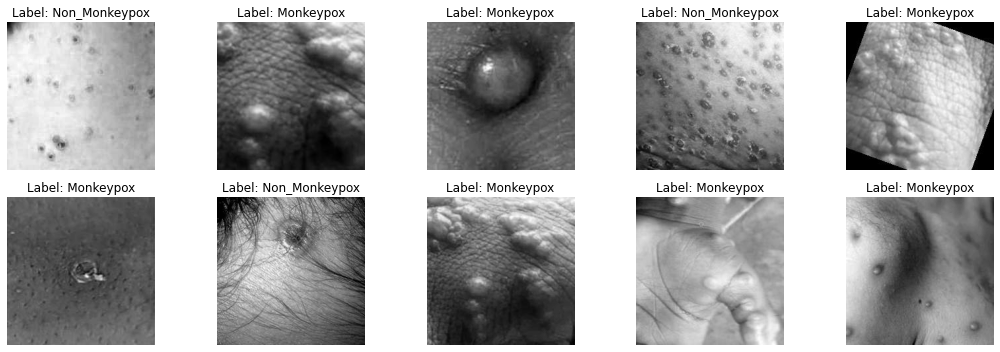

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {"Monkeypox" if label == 1 else "Non_Monkeypox"}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


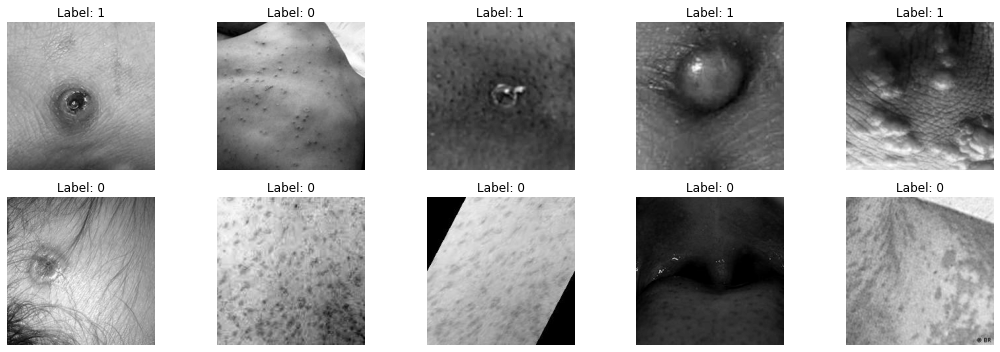

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


In [ ]:
images[0]

array([[0.3529412 , 0.3647059 , 0.36862746, ..., 0.38039216, 0.3764706 ,
        0.37254903],
       [0.37254903, 0.36862746, 0.35686275, ..., 0.4       , 0.39215687,
        0.37254903],
       [0.3882353 , 0.36862746, 0.34117648, ..., 0.4117647 , 0.40392157,
        0.3764706 ],
       ...,
       [0.6784314 , 0.6745098 , 0.67058825, ..., 0.4117647 , 0.4117647 ,
        0.4117647 ],
       [0.6784314 , 0.6745098 , 0.6745098 , ..., 0.41568628, 0.41568628,
        0.41568628],
       [0.6784314 , 0.6784314 , 0.6784314 , ..., 0.42745098, 0.42745098,
        0.42745098]], dtype=float32)

# Dense Layers

# 50 epochs

2024-11-13 14:44:15.848303: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 14:44:15.848835: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 14:44:15.850485: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 14:44:15.854579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731489255.861540    6286 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731489255.86

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6827 - auc: 0.7124 - auc_1: 0.7433 - false_negatives: 73.7097 - false_positives: 65.5484 - loss: 0.6790 - precision: 0.6780 - recall: 0.6481 - true_negatives: 188.4194 - true_positives: 183.2903 - val_accuracy: 0.8833 - val_auc: 0.9537 - val_auc_1: 0.9592 - val_false_negatives: 22.0000 - val_false_positives: 6.0000 - val_loss: 0.2814 - val_precision: 0.9412 - val_recall: 0.8136 - val_true_negatives: 116.0000 - val_true_positives: 96.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9334 - auc: 0.9738 - auc_1: 0.9724 - false_negatives: 20.8065 - false_positives: 13.0323 - loss: 0.2129 - precision: 0.9424 - recall: 0.9198 - true_negatives: 244.0645 - true_positives: 233.0645 - val_accuracy: 0.8708 - val_auc: 0.9611 - val_auc_1: 0.9660 - val_false_negatives: 30.0000 - val_false_positives: 1.0000 - val_loss: 0.3584 - val_precision: 0.9888 - val_recall: 0.7458 - val_true_negatives: 121.0000 - val_true_positiv

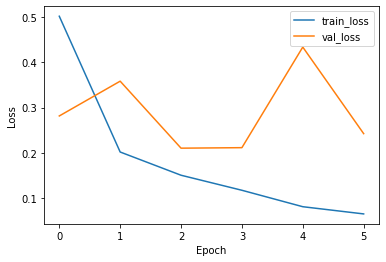

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9197 - auc: 0.9766 - auc_1: 0.9723 - false_negatives: 3.6667 - false_positives: 8.6667 - loss: 0.2134 - precision: 0.8832 - recall: 0.9413 - true_negatives: 73.7778 - true_positives: 66.7778
Test Accuracy: 91.67%
Precision: 0.89
Recall: 0.95
AUC-ROC: 0.98
AUC-PR: 0.98
TN: 108.0, FP: 14.0, FN: 6.0, TP: 112.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 837ms/step
Confusion Matrix:
[[108  14]
 [  6 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       122
           1       0.89      0.95      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92
Precision: 0.89
Recall: 0.95
F1 Score: 0.92
PR AUC: 0.93
Cohen's Kappa Coefficient: 0.83
Matthews Correlation Coefficient (MCC): 0.84
Balanced Accuracy: 0.92
Monkeypox Predictions: 52.50% (126/24

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add a Global Average Pooling layer to reduce the spatial dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a Dense layer with 512 units and relu activation
x = Dense(512, activation='relu')(x)

# Add another Dense layer with 256 units and relu activation
x = Dense(256, activation='relu')(x)

# Add a final Dense layer with sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the new Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")


# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 150 epochs

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6599 - auc_2: 0.7017 - auc_3: 0.7201 - false_negatives_1: 78.0000 - false_positives_1: 72.2581 - loss: 0.6714 - precision_1: 0.6669 - recall_1: 0.6368 - true_negatives_1: 180.0000 - true_positives_1: 180.7097 - val_accuracy: 0.8917 - val_auc_2: 0.9515 - val_auc_3: 0.9597 - val_false_negatives_1: 19.0000 - val_false_positives_1: 7.0000 - val_loss: 0.2778 - val_precision_1: 0.9340 - val_recall_1: 0.8390 - val_true_negatives_1: 115.0000 - val_true_positives_1: 99.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9339 - auc_2: 0.9716 - auc_3: 0.9777 - false_negatives_1: 23.7742 - false_positives_1: 12.3871 - loss: 0.2163 - precision_1: 0.9588 - recall_1: 0.9074 - true_negatives_1: 241.4194 - true_positives_1: 233.3871 - val_accuracy: 0.9125 - val_auc_2: 0.9698 - val_auc_3: 0.9709 - val_false_negatives_1: 15.0000 - val_false_positives_1: 6.0000 - val_loss: 0.2286 - val_precision_1: 0.9450 - val_recall_1: 0.

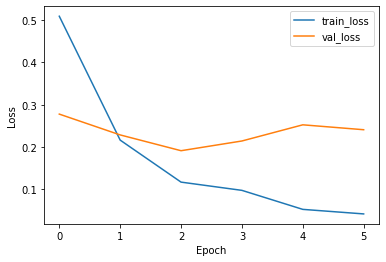

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.9230 - auc_2: 0.9775 - auc_3: 0.9734 - false_negatives_1: 6.4444 - false_positives_1: 5.0000 - loss: 0.1867 - precision_1: 0.9253 - recall_1: 0.8961 - true_negatives_1: 77.4444 - true_positives_1: 64.0000
Test Accuracy: 92.08%
Precision: 0.92
Recall: 0.92
AUC-ROC: 0.98
AUC-PR: 0.98
TN: 113.0, FP: 9.0, FN: 10.0, TP: 108.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 645ms/step
Confusion Matrix:
[[113   9]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       122
           1       0.92      0.92      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
PR AUC: 0.94
Cohen's Kappa Coefficient: 0.84
Matthews Correlation Coefficient (MCC): 0.84
Balanced Accuracy: 0.92
Monkeypox Prediction

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add a Global Average Pooling layer to reduce the spatial dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a Dense layer with 512 units and relu activation
x = Dense(512, activation='relu')(x)

# Add another Dense layer with 256 units and relu activation
x = Dense(256, activation='relu')(x)

# Add a final Dense layer with sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the new Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")


# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 200 epochs

2024-11-13 15:05:30.831000: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 15:05:30.835336: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 15:05:30.876390: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 15:05:30.915480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731490530.949132    3783 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731490530.95

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 664ms/step - accuracy: 0.6734 - auc: 0.7471 - auc_1: 0.7401 - false_negatives: 73.7419 - false_positives: 65.6452 - loss: 0.6086 - precision: 0.6753 - recall: 0.6544 - true_negatives: 193.5161 - true_positives: 178.0645 - val_accuracy: 0.8750 - val_auc: 0.9637 - val_auc_1: 0.9693 - val_false_negatives: 9.0000 - val_false_positives: 21.0000 - val_loss: 0.2946 - val_precision: 0.8385 - val_recall: 0.9237 - val_true_negatives: 101.0000 - val_true_positives: 109.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 708ms/step - accuracy: 0.9349 - auc: 0.9824 - auc_1: 0.9830 - false_negatives: 16.5806 - false_positives: 15.9355 - loss: 0.1945 - precision: 0.9293 - recall: 0.9408 - true_negatives: 236.9032 - true_positives: 241.5484 - val_accuracy: 0.9000 - val_auc: 0.9732 - val_auc_1: 0.9761 - val_false_negatives: 21.0000 - val_false_positives: 3.0000 - val_loss: 0.2399 - val_precision: 0.9700 - val_recall: 0.8220 - val_true_negatives: 119.0000 - val_tru

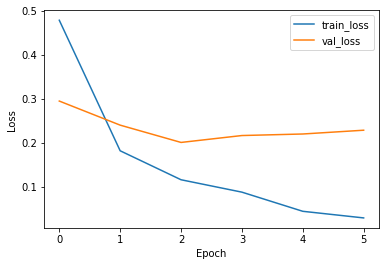

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 558ms/step - accuracy: 0.9057 - auc: 0.9820 - auc_1: 0.9800 - false_negatives: 3.3333 - false_positives: 10.0000 - loss: 0.1970 - precision: 0.8540 - recall: 0.9442 - true_negatives: 72.4444 - true_positives: 67.1111
Test Accuracy: 91.67%
Precision: 0.88
Recall: 0.96
AUC-ROC: 0.98
AUC-PR: 0.98
TN: 107.0, FP: 15.0, FN: 5.0, TP: 113.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 671ms/step
Confusion Matrix:
[[107  15]
 [  5 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       122
           1       0.88      0.96      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92
Precision: 0.88
Recall: 0.96
F1 Score: 0.92
PR AUC: 0.93
Cohen's Kappa Coefficient: 0.83
Matthews Correlation Coefficient (MCC): 0.84
Balanced Accuracy: 0.92
Monkeypox Predictions: 53.33% (12

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add a Global Average Pooling layer to reduce the spatial dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a Dense layer with 512 units and relu activation
x = Dense(512, activation='relu')(x)

# Add another Dense layer with 256 units and relu activation
x = Dense(256, activation='relu')(x)

# Add a final Dense layer with sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the new Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")


# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Dropout + Dense Layers

# 50 epochs

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 89,043,745 (339.67 MB)

 Trainable params: 67,240,961 (256.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5624 - auc_2: 0.5745 - auc_3: 0.5677 - false_negatives_1: 101.4516 - false_positives_1: 113.3226 - loss: 13.3515 - precision_1: 0.5705 - recall_1: 0.6061 - true_negatives_1: 136.5806 - true_positives_1: 159.6129 - val_accuracy: 0.8417 - val_auc_2: 0.8949 - val_auc_3: 0.9155 - val_false_negatives_1: 34.0000 - val_false_positives_1: 4.0000 - val_loss: 1.0703 - val_precision_1: 0.9545 - val_recall_1: 0.7119 - val_true_negatives_1: 118.0000 - val_true_positives_1: 84.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8127 - auc_2: 0.8595 - auc_3: 0.8288 - false_negatives_1: 38.3226 - false_positives_1: 52.6452 - loss: 1.5629 - precision_1: 0.8022 - recall_1: 0.8473 - true_negatives_1: 197.6774 - true_positives_1: 222.3226 - val_accuracy: 0.8792 - val_auc_2: 0.9344 - val_auc_3: 0.9118 - val_false_negatives_1: 13.0000 - val_false_positives_1: 16.0000 - val_loss: 0.6368 - val_precision_1: 0.8678 - val_recall_1: 

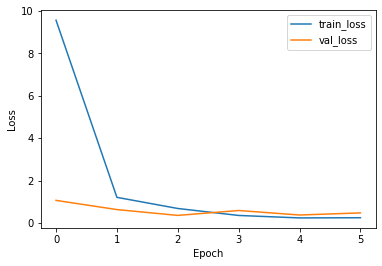

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.8959 - auc_2: 0.9648 - auc_3: 0.9547 - false_negatives_1: 5.3333 - false_positives_1: 10.0000 - loss: 0.3209 - precision_1: 0.8578 - recall_1: 0.9136 - true_negatives_1: 72.4444 - true_positives_1: 65.1111
Test Accuracy: 90.00%
Precision: 0.87
Recall: 0.93
AUC-ROC: 0.96
AUC-PR: 0.96
TN: 106.0, FP: 16.0, FN: 8.0, TP: 110.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 688ms/step
Confusion Matrix:
[[106  16]
 [  8 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       122
           1       0.87      0.93      0.90       118

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240

AUC Score: 0.90
Precision: 0.87
Recall: 0.93
F1 Score: 0.90
PR AUC: 0.92
Cohen's Kappa Coefficient: 0.80
Matthews Correlation Coefficient (MCC): 0.80
Balanced Accuracy: 0.90
Monkeypox Predictio

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of InceptionV3
x = Flatten()(base_model.output)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)

# Add final Dense layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 150 epochs

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 89,043,745 (339.67 MB)

 Trainable params: 67,240,961 (256.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5957 - auc_4: 0.6151 - auc_5: 0.6084 - false_negatives_2: 94.3548 - false_positives_2: 102.7097 - loss: 9.2582 - precision_2: 0.6010 - recall_2: 0.6286 - true_negatives_2: 148.8065 - true_positives_2: 165.0968 - val_accuracy: 0.7833 - val_auc_4: 0.8883 - val_auc_5: 0.8276 - val_false_negatives_2: 4.0000 - val_false_positives_2: 48.0000 - val_loss: 1.2952 - val_precision_2: 0.7037 - val_recall_2: 0.9661 - val_true_negatives_2: 74.0000 - val_true_positives_2: 114.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8254 - auc_4: 0.8664 - auc_5: 0.8383 - false_negatives_2: 40.0000 - false_positives_2: 46.2581 - loss: 1.5388 - precision_2: 0.8062 - recall_2: 0.8503 - true_negatives_2: 207.0323 - true_positives_2: 217.6774 - val_accuracy: 0.8958 - val_auc_4: 0.9593 - val_auc_5: 0.9509 - val_false_negatives_2: 10.0000 - val_false_positives_2: 15.0000 - val_loss: 0.5216 - val_precision_2: 0.8780 - val_recall_2: 

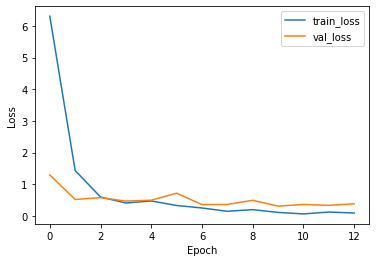

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.9243 - auc_4: 0.9782 - auc_5: 0.9718 - false_negatives_2: 3.4444 - false_positives_2: 7.3333 - loss: 0.2663 - precision_2: 0.8859 - recall_2: 0.9487 - true_negatives_2: 75.1111 - true_positives_2: 67.0000
Test Accuracy: 93.33%
Precision: 0.92
Recall: 0.95
AUC-ROC: 0.97
AUC-PR: 0.97
TN: 112.0, FP: 10.0, FN: 6.0, TP: 112.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 672ms/step
Confusion Matrix:
[[112  10]
 [  6 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       122
           1       0.92      0.95      0.93       118

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240

AUC Score: 0.93
Precision: 0.92
Recall: 0.95
F1 Score: 0.93
PR AUC: 0.95
Cohen's Kappa Coefficient: 0.87
Matthews Correlation Coefficient (MCC): 0.87
Balanced Accuracy: 0.93
Monkeypox Prediction

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of InceptionV3
x = Flatten()(base_model.output)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)

# Add final Dense layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 200 epochs

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_282 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_282[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_283 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_283[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_284 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_284[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 73, 73,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_12… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 89,043,745 (339.67 MB)

 Trainable params: 67,240,961 (256.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5832 - auc_6: 0.5829 - auc_7: 0.5595 - false_negatives_3: 105.5806 - false_positives_3: 101.7419 - loss: 10.6989 - precision_3: 0.5908 - recall_3: 0.5471 - true_negatives_3: 154.9355 - true_positives_3: 148.7097 - val_accuracy: 0.7792 - val_auc_6: 0.8615 - val_auc_7: 0.7874 - val_false_negatives_3: 5.0000 - val_false_positives_3: 48.0000 - val_loss: 1.4571 - val_precision_3: 0.7019 - val_recall_3: 0.9576 - val_true_negatives_3: 74.0000 - val_true_positives_3: 113.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8099 - auc_6: 0.8534 - auc_7: 0.8098 - false_negatives_3: 32.9355 - false_positives_3: 55.3226 - loss: 1.9607 - precision_3: 0.7777 - recall_3: 0.8860 - true_negatives_3: 197.0645 - true_positives_3: 225.6452 - val_accuracy: 0.8625 - val_auc_6: 0.9535 - val_auc_7: 0.9320 - val_false_negatives_3: 5.0000 - val_false_positives_3: 28.0000 - val_loss: 0.5897 - val_precision_3: 0.8014 - val_recall_3:

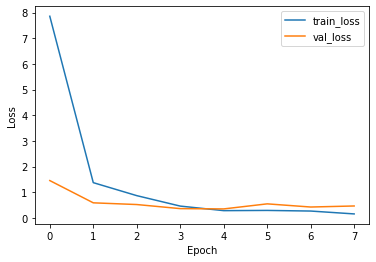

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.9296 - auc_6: 0.9636 - auc_7: 0.9592 - false_negatives_3: 5.0000 - false_positives_3: 5.3333 - loss: 0.3419 - precision_3: 0.9126 - recall_3: 0.9277 - true_negatives_3: 77.1111 - true_positives_3: 65.4444
Test Accuracy: 93.33%
Precision: 0.94
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.97
TN: 115.0, FP: 7.0, FN: 9.0, TP: 109.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 655ms/step
Confusion Matrix:
[[115   7]
 [  9 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       122
           1       0.94      0.92      0.93       118

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240

AUC Score: 0.93
Precision: 0.94
Recall: 0.92
F1 Score: 0.93
PR AUC: 0.95
Cohen's Kappa Coefficient: 0.87
Matthews Correlation Coefficient (MCC): 0.87
Balanced Accuracy: 0.93
Monkeypox Predictions

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of InceptionV3
x = Flatten()(base_model.output)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)

# Add final Dense layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# GlobalAveragePooling2D

# 50 epochs

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 775ms/step - accuracy: 0.5801 - auc_8: 0.6199 - auc_9: 0.6368 - loss: 0.7715 - precision_4: 0.5911 - recall_4: 0.6390 - val_accuracy: 0.8750 - val_auc_8: 0.9202 - val_auc_9: 0.9372 - val_loss: 0.3687 - val_precision_4: 0.9151 - val_recall_4: 0.8220
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.8041 - auc_8: 0.8862 - auc_9: 0.8950 - loss: 0.4235 - precision_4: 0.8136 - recall_4: 0.7928 - val_accuracy: 0.9000 - val_auc_8: 0.9465 - val_auc_9: 0.9574 - val_loss: 0.2805 - val_precision_4: 0.9196 - val_recall_4: 0.8729
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.8823 - auc_8: 0.9516 - auc_9: 0.9578 - loss: 0.2842 - precision_4: 0.8776 - recall_4: 0.8953 - val_accuracy: 0.9042 - val_auc_8: 0.9652 - val_auc_9: 0.9685 - val_loss: 0.2587 - val_precision_4: 0.9703 - val_recall_4: 0.8305
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.9058 - auc_8: 0.9684 - auc_9: 0.9713 - loss: 0.2295 - precis

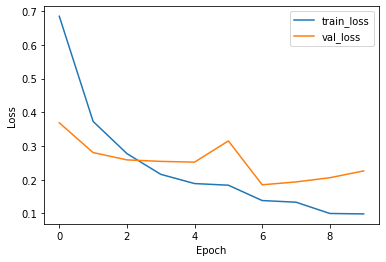

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 658ms/step
Accuracy: 0.93
Precision: 0.93
Recall (Sensitivity): 0.92
F1 Score: 0.93
Specificity: 0.93
Confusion Matrix:
[[114   8]
 [  9 109]]
Area Under the ROC Curve (AUC-ROC): 0.93


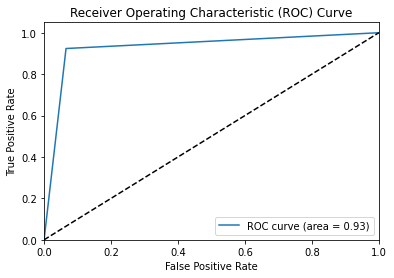

Precision-Recall Curve (AUC-PR): 0.95


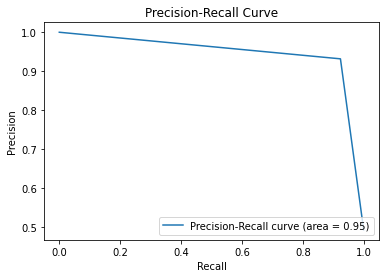

Cohen's Kappa Coefficient: 0.86
Matthews Correlation Coefficient (MCC): 0.86
Balanced Accuracy: 0.93
Monkeypox Predictions: 48.75% (117/240)
Non-Monkeypox Predictions: 51.25% (123/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 233.63 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      ])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 781ms/step - accuracy: 0.5748 - auc_10: 0.6300 - auc_11: 0.6562 - loss: 0.7748 - precision_5: 0.5695 - recall_5: 0.5812 - val_accuracy: 0.8458 - val_auc_10: 0.9222 - val_auc_11: 0.9359 - val_loss: 0.3635 - val_precision_5: 0.8403 - val_recall_5: 0.8475
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 748ms/step - accuracy: 0.7907 - auc_10: 0.8803 - auc_11: 0.8854 - loss: 0.4444 - precision_5: 0.7785 - recall_5: 0.7996 - val_accuracy: 0.9000 - val_auc_10: 0.9521 - val_auc_11: 0.9604 - val_loss: 0.2786 - val_precision_5: 0.9434 - val_recall_5: 0.8475
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 751ms/step - accuracy: 0.8734 - auc_10: 0.9435 - auc_11: 0.9413 - loss: 0.3083 - precision_5: 0.8778 - recall_5: 0.8730 - val_accuracy: 0.8917 - val_auc_10: 0.9648 - val_auc_11: 0.9684 - val_loss: 0.2404 - val_precision_5: 0.9035 - val_recall_5: 0.8729
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 757ms/step - accuracy: 0.9059 - auc_10: 0.9696 - auc_11: 0.9716 - los

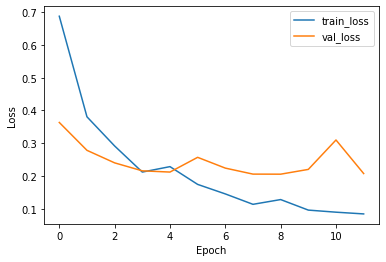

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 665ms/step
Accuracy: 0.92
Precision: 0.95
Recall (Sensitivity): 0.89
F1 Score: 0.92
Specificity: 0.95
Confusion Matrix:
[[116   6]
 [ 13 105]]
Area Under the ROC Curve (AUC-ROC): 0.92


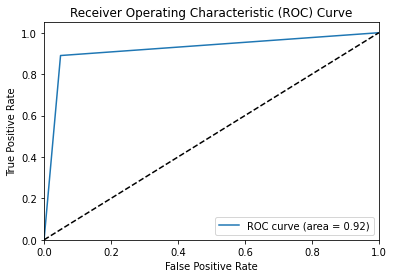

Precision-Recall Curve (AUC-PR): 0.94


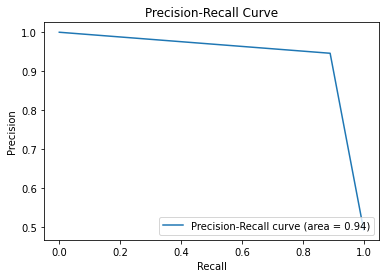

Cohen's Kappa Coefficient: 0.84
Matthews Correlation Coefficient (MCC): 0.84
Balanced Accuracy: 0.92
Monkeypox Predictions: 46.25% (111/240)
Non-Monkeypox Predictions: 53.75% (129/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 283.47 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      ])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 785ms/step - accuracy: 0.6433 - auc_12: 0.6951 - auc_13: 0.7232 - loss: 0.6827 - precision_6: 0.6505 - recall_6: 0.6773 - val_accuracy: 0.8208 - val_auc_12: 0.9215 - val_auc_13: 0.9361 - val_loss: 0.4335 - val_precision_6: 0.9630 - val_recall_6: 0.6610
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 754ms/step - accuracy: 0.7620 - auc_12: 0.8674 - auc_13: 0.8855 - loss: 0.4908 - precision_6: 0.7936 - recall_6: 0.7484 - val_accuracy: 0.8792 - val_auc_12: 0.9481 - val_auc_13: 0.9568 - val_loss: 0.2800 - val_precision_6: 0.9083 - val_recall_6: 0.8390
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 745ms/step - accuracy: 0.8511 - auc_12: 0.9313 - auc_13: 0.9314 - loss: 0.3455 - precision_6: 0.8732 - recall_6: 0.8184 - val_accuracy: 0.8792 - val_auc_12: 0.9632 - val_auc_13: 0.9687 - val_loss: 0.3296 - val_precision_6: 0.9890 - val_recall_6: 0.7627
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 748ms/step - accuracy: 0.9266 - auc_12: 0.9697 - auc_13: 0.9729 - los

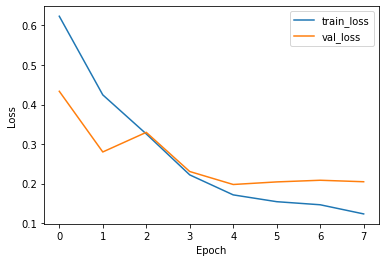

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 638ms/step
Accuracy: 0.91
Precision: 0.94
Recall (Sensitivity): 0.87
F1 Score: 0.91
Specificity: 0.95
Confusion Matrix:
[[116   6]
 [ 15 103]]
Area Under the ROC Curve (AUC-ROC): 0.91


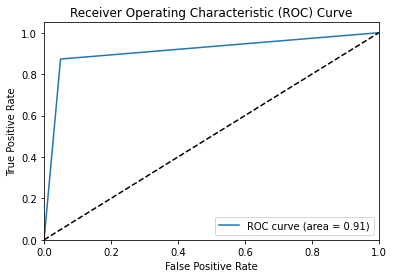

Precision-Recall Curve (AUC-PR): 0.94


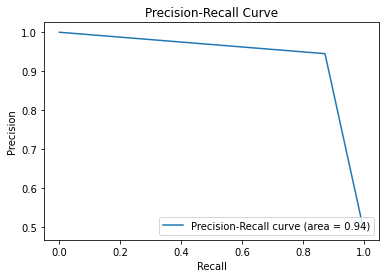

Cohen's Kappa Coefficient: 0.82
Matthews Correlation Coefficient (MCC): 0.83
Balanced Accuracy: 0.91
Monkeypox Predictions: 45.42% (109/240)
Non-Monkeypox Predictions: 54.58% (131/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 190.17 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      ])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers

# 50 epochs

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 803ms/step - accuracy: 0.5734 - auc_14: 0.6025 - auc_15: 0.6160 - false_negatives_4: 101.5161 - false_positives_4: 100.1290 - loss: 0.8266 - precision_7: 0.5453 - recall_7: 0.5349 - true_negatives_4: 157.2581 - true_positives_4: 152.0645 - val_accuracy: 0.8458 - val_auc_14: 0.9179 - val_auc_15: 0.9363 - val_false_negatives_4: 33.0000 - val_false_positives_4: 4.0000 - val_loss: 0.4058 - val_precision_7: 0.9551 - val_recall_7: 0.7203 - val_true_negatives_4: 118.0000 - val_true_positives_4: 85.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 746ms/step - accuracy: 0.7886 - auc_14: 0.8565 - auc_15: 0.8582 - false_negatives_4: 48.8064 - false_positives_4: 55.6129 - loss: 0.5052 - precision_7: 0.7861 - recall_7: 0.7846 - true_negatives_4: 199.5484 - true_positives_4: 207.0000 - val_accuracy: 0.8625 - val_auc_14: 0.9437 - val_auc_15: 0.9523 - val_false_negatives_4: 15.0000 - val_false_positives_4: 18.0000 - val_loss: 0.3048 - val_precision_7: 0.8512 - v

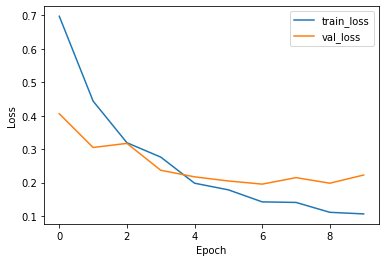

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.9206 - auc_14: 0.9799 - auc_15: 0.9751 - false_negatives_4: 8.6667 - false_positives_4: 3.2222 - loss: 0.1919 - precision_7: 0.9539 - recall_7: 0.8608 - true_negatives_4: 79.2222 - true_positives_4: 61.7778
Test Accuracy: 92.08%
Precision: 0.95
Recall: 0.88
AUC-ROC: 0.98
AUC-PR: 0.98
TP: 104.0, FP: 5.0, TN: 117.0, FN: 14.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 645ms/step
Confusion Matrix:
[[117   5]
 [ 14 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       122
           1       0.95      0.88      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92
Precision: 0.95
Recall: 0.88
F1 Score: 0.92
PR AUC: 0.95
Cohen's Kappa Coefficient: 0.84
Matthews Correlation Coefficient (MCC): 0.84
Balanced Accuracy: 0.92
Monkeypox Predicti

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 150 epochs

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 783ms/step - accuracy: 0.5982 - auc_16: 0.6490 - auc_17: 0.6193 - false_negatives_5: 94.2903 - false_positives_5: 97.7742 - loss: 0.7520 - precision_8: 0.5828 - recall_8: 0.5924 - true_negatives_5: 161.0323 - true_positives_5: 157.8710 - val_accuracy: 0.8542 - val_auc_16: 0.9331 - val_auc_17: 0.9483 - val_false_negatives_5: 15.0000 - val_false_positives_5: 20.0000 - val_loss: 0.3413 - val_precision_8: 0.8374 - val_recall_8: 0.8729 - val_true_negatives_5: 102.0000 - val_true_positives_5: 103.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 745ms/step - accuracy: 0.8147 - auc_16: 0.8848 - auc_17: 0.8773 - false_negatives_5: 48.0000 - false_positives_5: 42.1290 - loss: 0.4502 - precision_8: 0.8145 - recall_8: 0.8025 - true_negatives_5: 217.2581 - true_positives_5: 203.5806 - val_accuracy: 0.8917 - val_auc_16: 0.9522 - val_auc_17: 0.9623 - val_false_negatives_5: 25.0000 - val_false_positives_5: 1.0000 - val_loss: 0.3001 - val_precision_8: 0.9894 - 

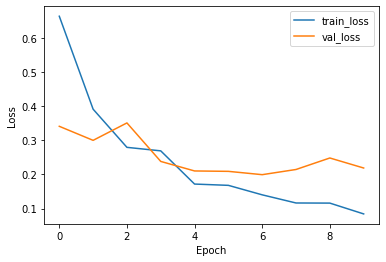

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.9245 - auc_16: 0.9762 - auc_17: 0.9736 - false_negatives_5: 6.2222 - false_positives_5: 5.5556 - loss: 0.2035 - precision_8: 0.9180 - recall_8: 0.9091 - true_negatives_5: 76.8889 - true_positives_5: 64.2222
Test Accuracy: 92.08%
Precision: 0.92
Recall: 0.92
AUC-ROC: 0.98
AUC-PR: 0.98
TP: 108.0, FP: 9.0, TN: 113.0, FN: 10.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step
Confusion Matrix:
[[113   9]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       122
           1       0.92      0.92      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
PR AUC: 0.94
Cohen's Kappa Coefficient: 0.84
Matthews Correlation Coefficient (MCC): 0.84
Balanced Accuracy: 0.92
Monkeypox Predicti

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 200 epochs

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 786ms/step - accuracy: 0.5853 - auc_18: 0.6460 - auc_19: 0.6692 - false_negatives_6: 89.8064 - false_positives_6: 109.0323 - loss: 0.7659 - precision_9: 0.5834 - recall_9: 0.6240 - true_negatives_6: 142.5806 - true_positives_6: 169.5484 - val_accuracy: 0.8500 - val_auc_18: 0.9286 - val_auc_19: 0.9427 - val_false_negatives_6: 32.0000 - val_false_positives_6: 4.0000 - val_loss: 0.3740 - val_precision_9: 0.9556 - val_recall_9: 0.7288 - val_true_negatives_6: 118.0000 - val_true_positives_6: 86.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 755ms/step - accuracy: 0.8092 - auc_18: 0.8787 - auc_19: 0.8911 - false_negatives_6: 51.0645 - false_positives_6: 50.1613 - loss: 0.4512 - precision_9: 0.8117 - recall_9: 0.8046 - true_negatives_6: 205.8065 - true_positives_6: 203.9355 - val_accuracy: 0.8958 - val_auc_18: 0.9482 - val_auc_19: 0.9585 - val_false_negatives_6: 21.0000 - val_false_positives_6: 4.0000 - val_loss: 0.2936 - val_precision_9: 0.9604 - v

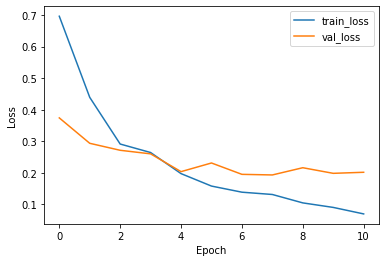

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.9330 - auc_18: 0.9763 - auc_19: 0.9664 - false_negatives_6: 6.4444 - false_positives_6: 4.0000 - loss: 0.1845 - precision_9: 0.9494 - recall_9: 0.8961 - true_negatives_6: 78.4444 - true_positives_6: 64.0000
Test Accuracy: 92.50%
Precision: 0.93
Recall: 0.92
AUC-ROC: 0.98
AUC-PR: 0.97
TP: 108.0, FP: 8.0, TN: 114.0, FN: 10.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step
Confusion Matrix:
[[114   8]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       122
           1       0.93      0.92      0.92       118

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240

AUC Score: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92
PR AUC: 0.94
Cohen's Kappa Coefficient: 0.85
Matthews Correlation Coefficient (MCC): 0.85
Balanced Accuracy: 0.92
Monkeypox Predicti

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# LSTM + Dense Layers

# 50 epochs

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    67,174,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,986,017 (339.45 MB)

 Trainable params: 67,183,233 (256.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7402 - auc_20: 0.8197 - auc_21: 0.8279 - false_negatives_7: 41.2581 - false_positives_7: 75.8387 - loss: 0.5376 - precision_10: 0.7134 - recall_10: 0.8449 - true_negatives_7: 176.9355 - true_positives_7: 216.9355 - val_accuracy: 0.8417 - val_auc_20: 0.9385 - val_auc_21: 0.9411 - val_false_negatives_7: 14.0000 - val_false_positives_7: 24.0000 - val_loss: 0.3959 - val_precision_10: 0.8125 - val_recall_10: 0.8814 - val_true_negatives_7: 98.0000 - val_true_positives_7: 104.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8934 - auc_20: 0.9653 - auc_21: 0.9646 - false_negatives_7: 17.3548 - false_positives_7: 33.7742 - loss: 0.3150 - precision_10: 0.8657 - recall_10: 0.9410 - true_negatives_7: 214.0645 - true_positives_7: 245.7742 - val_accuracy: 0.9083 - val_auc_20: 0.9673 - val_auc_21: 0.9694 - val_false_negatives_7: 11.0000 - val_false_positives_7: 11.0000 - val_loss: 0.2613 - val_precision_10: 0.9068 - v

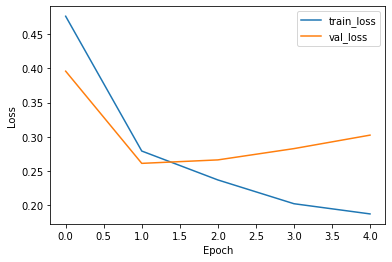

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.8974 - auc_20: 0.9608 - auc_21: 0.9551 - false_negatives_7: 7.1111 - false_positives_7: 8.1111 - loss: 0.2700 - precision_10: 0.8790 - recall_10: 0.8873 - true_negatives_7: 74.3333 - true_positives_7: 63.3333
Test Accuracy: 90.83%
Precision: 0.91
Recall: 0.91
AUC-ROC: 0.97
AUC-PR: 0.97
TP: 107.0, FP: 11.0, TN: 111.0, FN: 11.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step
Confusion Matrix:
[[111  11]
 [ 11 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       122
           1       0.91      0.91      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240

AUC Score: 0.91

Precision: 0.9067796610169492
Recall: 0.9067796610169492
F1 Score: 0.9067796610169492
Cohen's Kappa Coefficient: 0.82
Matthews Correlation Coefficient (MCC): 0.82
Balanced 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 150 epochs

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │    67,174,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,986,017 (339.45 MB)

 Trainable params: 67,183,233 (256.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6918 - auc_22: 0.7620 - auc_23: 0.7727 - false_negatives_8: 75.0323 - false_positives_8: 66.0000 - loss: 0.5833 - precision_11: 0.6978 - recall_11: 0.7046 - true_negatives_8: 187.7742 - true_positives_8: 182.1613 - val_accuracy: 0.8167 - val_auc_22: 0.9050 - val_auc_23: 0.9024 - val_false_negatives_8: 32.0000 - val_false_positives_8: 12.0000 - val_loss: 0.4382 - val_precision_11: 0.8776 - val_recall_11: 0.7288 - val_true_negatives_8: 110.0000 - val_true_positives_8: 86.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8721 - auc_22: 0.9426 - auc_23: 0.9413 - false_negatives_8: 30.1613 - false_positives_8: 34.1936 - loss: 0.3667 - precision_11: 0.8786 - recall_11: 0.8720 - true_negatives_8: 218.3548 - true_positives_8: 228.2581 - val_accuracy: 0.8792 - val_auc_22: 0.9458 - val_auc_23: 0.9477 - val_false_negatives_8: 14.0000 - val_false_positives_8: 15.0000 - val_loss: 0.3089 - val_precision_11: 0.8739 -

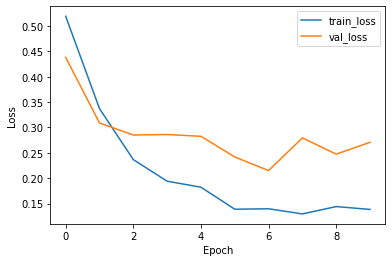

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.9321 - auc_22: 0.9787 - auc_23: 0.9785 - false_negatives_8: 5.2222 - false_positives_8: 5.5556 - loss: 0.2010 - precision_11: 0.9175 - recall_11: 0.9307 - true_negatives_8: 76.8889 - true_positives_8: 65.2222
Test Accuracy: 92.50%
Precision: 0.93
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.98
TP: 108.0, FP: 8.0, TN: 114.0, FN: 10.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 662ms/step
Confusion Matrix:
[[114   8]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       122
           1       0.93      0.92      0.92       118

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240

AUC Score: 0.92

Precision: 0.9310344827586207
Recall: 0.9152542372881356
F1 Score: 0.9230769230769231
Cohen's Kappa Coefficient: 0.85
Matthews Correlation Coefficient (MCC): 0.85
Balanced A

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# 200 epochs

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │    67,174,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,986,017 (339.45 MB)

 Trainable params: 67,183,233 (256.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7013 - auc_24: 0.7662 - auc_25: 0.7777 - false_negatives_9: 63.0645 - false_positives_9: 74.4516 - loss: 0.5681 - precision_12: 0.6811 - recall_12: 0.7083 - true_negatives_9: 179.5161 - true_positives_9: 193.9355 - val_accuracy: 0.8250 - val_auc_24: 0.9169 - val_auc_25: 0.9210 - val_false_negatives_9: 12.0000 - val_false_positives_9: 30.0000 - val_loss: 0.4252 - val_precision_12: 0.7794 - val_recall_12: 0.8983 - val_true_negatives_9: 92.0000 - val_true_positives_9: 106.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8786 - auc_24: 0.9432 - auc_25: 0.9349 - false_negatives_9: 23.5806 - false_positives_9: 36.3548 - loss: 0.3443 - precision_12: 0.8588 - recall_12: 0.9024 - true_negatives_9: 219.6774 - true_positives_9: 231.3548 - val_accuracy: 0.8792 - val_auc_24: 0.9461 - val_auc_25: 0.9400 - val_false_negatives_9: 13.0000 - val_false_positives_9: 16.0000 - val_loss: 0.3164 - val_precision_12: 0.8678 -

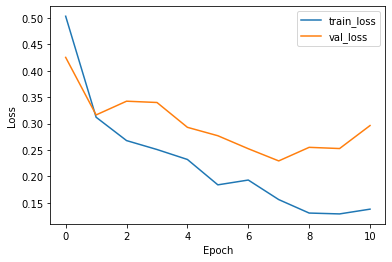

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.9038 - auc_24: 0.9614 - auc_25: 0.9568 - false_negatives_9: 6.4444 - false_positives_9: 8.2222 - loss: 0.2464 - precision_12: 0.8858 - recall_12: 0.8961 - true_negatives_9: 74.2222 - true_positives_9: 64.0000
Test Accuracy: 90.42%
Precision: 0.89
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.97
TP: 108.0, FP: 13.0, TN: 109.0, FN: 10.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step
Confusion Matrix:
[[109  13]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       122
           1       0.89      0.92      0.90       118

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240

AUC Score: 0.90

Precision: 0.8925619834710744
Recall: 0.9152542372881356
F1 Score: 0.9037656903765691
Cohen's Kappa Coefficient: 0.81
Matthews Correlation Coefficient (MCC): 0.81
Balanced 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# GRU + Dense Layers

# 50 epochs

2024-11-13 16:16:34.473441: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 16:16:34.477833: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 16:16:34.519509: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 16:16:34.558563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731494794.591983    3874 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731494794.60

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │    50,381,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,192,673 (275.39 MB)

 Trainable params: 50,389,889 (192.22 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 955ms/step - accuracy: 0.7194 - auc: 0.7767 - auc_1: 0.7754 - false_negatives: 69.7419 - false_positives: 55.4839 - loss: 0.5610 - precision: 0.7407 - recall: 0.6401 - true_negatives: 204.7742 - true_positives: 180.9677 - val_accuracy: 0.8500 - val_auc: 0.9246 - val_auc_1: 0.9198 - val_false_negatives: 13.0000 - val_false_positives: 23.0000 - val_loss: 0.3980 - val_precision: 0.8203 - val_recall: 0.8898 - val_true_negatives: 99.0000 - val_true_positives: 105.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 979ms/step - accuracy: 0.8896 - auc: 0.9616 - auc_1: 0.9631 - false_negatives: 28.0000 - false_positives: 26.7419 - loss: 0.3114 - precision: 0.8831 - recall: 0.9028 - true_negatives: 229.7419 - true_positives: 226.4839 - val_accuracy: 0.9000 - val_auc: 0.9533 - val_auc_1: 0.9528 - val_false_negatives: 15.0000 - val_false_positives: 9.0000 - val_loss: 0.2972 - val_precision: 0.9196 - val_recall: 0.8729 - val_true_negatives: 113.0000 - val_true_

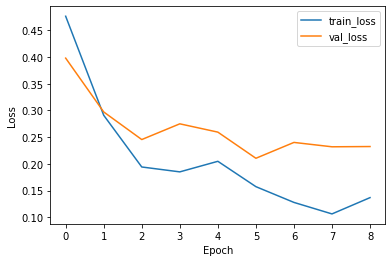

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step - accuracy: 0.9051 - auc: 0.9760 - auc_1: 0.9745 - false_negatives: 2.2222 - false_positives: 12.0000 - loss: 0.2292 - precision: 0.8425 - recall: 0.9637 - true_negatives: 70.4444 - true_positives: 68.2222
Test Accuracy: 90.83%
Precision: 0.86
Recall: 0.97
AUC-ROC: 0.98
AUC-PR: 0.98
TP: 114.0, FP: 18.0, TN: 104.0, FN: 4.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 673ms/step
Confusion Matrix:
[[104  18]
 [  4 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       122
           1       0.86      0.97      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240

AUC Score: 0.91

Precision: 0.8636363636363636
Recall: 0.9661016949152542
F1 Score: 0.912
Cohen's Kappa Coefficient: 0.82
Matthews Correlation Coefficient (MCC): 0.82
Balanced Accuracy: 0.91
Monkeypox Predic

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = tf.keras.Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for GRU
reshape = Reshape((1, -1))(flatten)

# Define the GRU layer
gru = GRU(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(gru)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │    50,381,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,192,673 (275.39 MB)

 Trainable params: 50,389,889 (192.22 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5880 - auc_2: 0.6187 - auc_3: 0.6055 - false_negatives_1: 102.3871 - false_positives_1: 93.8387 - loss: 0.7791 - precision_1: 0.6017 - recall_1: 0.6273 - true_negatives_1: 161.0323 - true_positives_1: 153.7097 - val_accuracy: 0.7875 - val_auc_2: 0.8897 - val_auc_3: 0.8876 - val_false_negatives_1: 35.0000 - val_false_positives_1: 16.0000 - val_loss: 0.4930 - val_precision_1: 0.8384 - val_recall_1: 0.7034 - val_true_negatives_1: 106.0000 - val_true_positives_1: 83.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8667 - auc_2: 0.9411 - auc_3: 0.9411 - false_negatives_1: 37.2258 - false_positives_1: 28.6452 - loss: 0.4172 - precision_1: 0.8953 - recall_1: 0.8407 - true_negatives_1: 221.2258 - true_positives_1: 223.8710 - val_accuracy: 0.8375 - val_auc_2: 0.9277 - val_auc_3: 0.9282 - val_false_negatives_1: 28.0000 - val_false_positives_1: 11.0000 - val_loss: 0.3940 - val_precision_1: 0.8911 - val_recall_1:

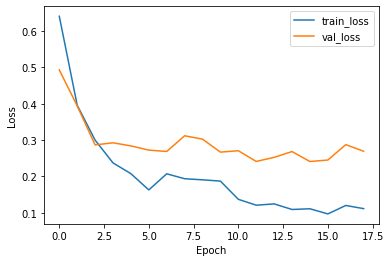

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.8943 - auc_2: 0.9614 - auc_3: 0.9469 - false_negatives_1: 5.2222 - false_positives_1: 10.0000 - loss: 0.2810 - precision_1: 0.8540 - recall_1: 0.9132 - true_negatives_1: 72.4444 - true_positives_1: 65.2222
Test Accuracy: 90.42%
Precision: 0.88
Recall: 0.93
AUC-ROC: 0.97
AUC-PR: 0.96
TP: 110.0, FP: 15.0, TN: 107.0, FN: 8.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 697ms/step
Confusion Matrix:
[[107  15]
 [  8 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       122
           1       0.88      0.93      0.91       118

    accuracy                           0.90       240
   macro avg       0.91      0.90      0.90       240
weighted avg       0.91      0.90      0.90       240

AUC Score: 0.90

Precision: 0.88
Recall: 0.9322033898305084
F1 Score: 0.9053497942386831
Cohen's Kappa Coefficient: 0.81
Matthews Correlation Coefficient (MCC): 0.81
Balanced Accuracy: 0.90
Mon

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = tf.keras.Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for GRU
reshape = Reshape((1, -1))(flatten)

# Define the GRU layer
gru = GRU(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(gru)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │    50,381,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,192,673 (275.39 MB)

 Trainable params: 50,389,889 (192.22 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6391 - auc_4: 0.6726 - auc_5: 0.6465 - false_negatives_2: 72.7419 - false_positives_2: 96.2581 - loss: 0.6940 - precision_2: 0.6442 - recall_2: 0.7381 - true_negatives_2: 151.9677 - true_positives_2: 190.0000 - val_accuracy: 0.7875 - val_auc_4: 0.8707 - val_auc_5: 0.8673 - val_false_negatives_2: 21.0000 - val_false_positives_2: 30.0000 - val_loss: 0.5464 - val_precision_2: 0.7638 - val_recall_2: 0.8220 - val_true_negatives_2: 92.0000 - val_true_positives_2: 97.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8078 - auc_4: 0.8976 - auc_5: 0.9010 - false_negatives_2: 54.6129 - false_positives_2: 42.7097 - loss: 0.4800 - precision_2: 0.8155 - recall_2: 0.7951 - true_negatives_2: 215.7097 - true_positives_2: 197.9355 - val_accuracy: 0.7917 - val_auc_4: 0.9213 - val_auc_5: 0.9224 - val_false_negatives_2: 40.0000 - val_false_positives_2: 10.0000 - val_loss: 0.4448 - val_precision_2: 0.8864 - val_recall_2: 0

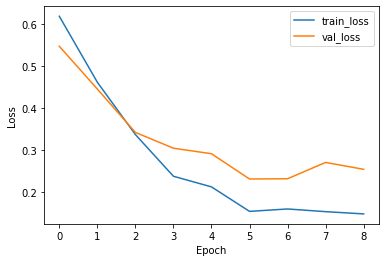

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.9210 - auc_4: 0.9695 - auc_5: 0.9611 - false_negatives_2: 8.3333 - false_positives_2: 4.0000 - loss: 0.2263 - precision_2: 0.9307 - recall_2: 0.8869 - true_negatives_2: 78.4444 - true_positives_2: 62.1111
Test Accuracy: 91.67%
Precision: 0.95
Recall: 0.88
AUC-ROC: 0.97
AUC-PR: 0.97
TP: 104.0, FP: 6.0, TN: 116.0, FN: 14.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step
Confusion Matrix:
[[116   6]
 [ 14 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       122
           1       0.95      0.88      0.91       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92

Precision: 0.9454545454545454
Recall: 0.8813559322033898
F1 Score: 0.9122807017543859
Cohen's Kappa Coefficient: 0.83
Matthews Correlation Coefficient (MCC): 0.83
Balanced Accur

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = tf.keras.Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for GRU
reshape = Reshape((1, -1))(flatten)

# Define the GRU layer
gru = GRU(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(gru)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Capsule Network

# 50 epochs

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,769 (147.25 MB)

 Trainable params: 16,797,985 (64.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 898ms/step - accuracy: 0.4022 - loss: 0.7271 - val_accuracy: 0.3500 - val_loss: 0.7646
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - accuracy: 0.5575 - loss: 0.6869 - val_accuracy: 0.3500 - val_loss: 0.7438
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 625ms/step - accuracy: 0.5825 - loss: 0.6768 - val_accuracy: 0.3500 - val_loss: 0.7152
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 625ms/step - accuracy: 0.5679 - loss: 0.6840 - val_accuracy: 0.3500 - val_loss: 0.6944
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 0.5604 - loss: 0.6923 - val_accuracy: 0.6500 - val_loss: 0.6894
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - accuracy: 0.6310 - loss: 0.6900 - val_accuracy: 0.3500 - val_loss: 0.7038
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 0.5377 - loss: 0.6876 - val_accuracy: 0.3500 - val_loss: 0.7081
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.5471 - loss: 0.6863 - val_accuracy: 0.3500 - val_loss:

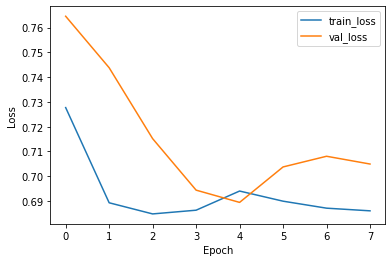

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6500 - loss: 0.6894
Test Accuracy: 65.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  7]
 [ 0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20

AUC Score: 0.50

Precision: 0.65
Recall: 1.0
F1 Score: 0.7878787878787878
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 26.28 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer_1 (CapsuleLayer)  │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,769 (147.25 MB)

 Trainable params: 16,797,985 (64.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 959ms/step - accuracy: 0.4578 - loss: 0.7197 - val_accuracy: 0.4000 - val_loss: 0.7228
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 653ms/step - accuracy: 0.4880 - loss: 0.7044 - val_accuracy: 0.4000 - val_loss: 0.6962
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - accuracy: 0.5454 - loss: 0.6924 - val_accuracy: 0.6000 - val_loss: 0.6922
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.4901 - loss: 0.6925 - val_accuracy: 0.6000 - val_loss: 0.6900
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.4833 - loss: 0.6926 - val_accuracy: 0.4000 - val_loss: 0.6949
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 637ms/step - accuracy: 0.5505 - loss: 0.6908 - val_accuracy: 0.4000 - val_loss: 0.7020
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.5610 - loss: 0.6879 - val_accuracy: 0.4000 - val_loss: 0.7102
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


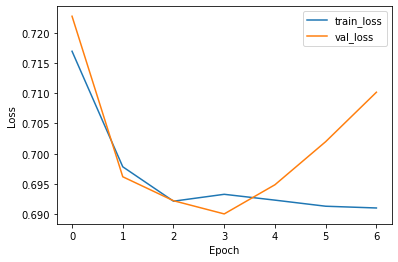

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.6000 - loss: 0.6900
Test Accuracy: 60.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[12  0]
 [ 8  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 24.58 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer_3 (CapsuleLayer)  │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,769 (147.25 MB)

 Trainable params: 16,797,985 (64.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 808ms/step - accuracy: 0.4211 - loss: 0.7310 - val_accuracy: 0.4000 - val_loss: 0.7037
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.5010 - loss: 0.6902 - val_accuracy: 0.6000 - val_loss: 0.6794
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 534ms/step - accuracy: 0.5379 - loss: 0.6881 - val_accuracy: 0.6000 - val_loss: 0.6733
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 539ms/step - accuracy: 0.5347 - loss: 0.6946 - val_accuracy: 0.6000 - val_loss: 0.6733
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.5754 - loss: 0.6834 - val_accuracy: 0.6000 - val_loss: 0.6740
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 0.5639 - loss: 0.6890 - val_accuracy: 0.6000 - val_loss: 0.6736
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 0.5129 - loss: 0.7100 - val_accuracy: 0.6000 - val_loss: 0.6734
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


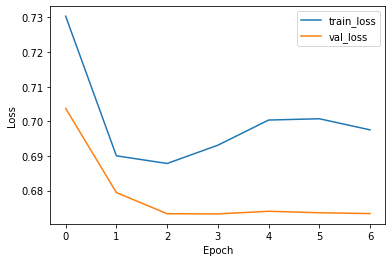

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.6000 - loss: 0.6733
Test Accuracy: 60.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix:
[[ 0  8]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50

Precision: 0.6
Recall: 1.0
F1 Score: 0.75
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 21.65 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Dense Layers using LeakyReLU

# 50 epochs

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 763ms/step - accuracy: 0.4550 - auc_6: 0.4490 - auc_7: 0.4919 - loss: 1.1028 - precision_3: 0.4832 - recall_3: 0.5119 - val_accuracy: 0.6000 - val_auc_6: 0.4010 - val_auc_7: 0.5024 - val_loss: 0.8198 - val_precision_3: 0.6000 - val_recall_3: 1.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 0.5135 - auc_6: 0.4469 - auc_7: 0.5327 - loss: 1.1144 - precision_3: 0.5298 - recall_3: 0.8681 - val_accuracy: 0.4000 - val_auc_6: 0.4792 - val_auc_7: 0.5464 - val_loss: 0.8980 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.5252 - auc_6: 0.4656 - auc_7: 0.5345 - loss: 0.9672 - precision_3: 0.5785 - recall_3: 0.3500 - val_accuracy: 0.6000 - val_auc_6: 0.4479 - val_auc_7: 0.5240 - val_loss: 0.7570 - val_precision_3: 0.6000 - val_recall_3: 1.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.5960 - auc_6: 0.4851 - auc_7: 0.5737 - loss: 0.9715 - precision_

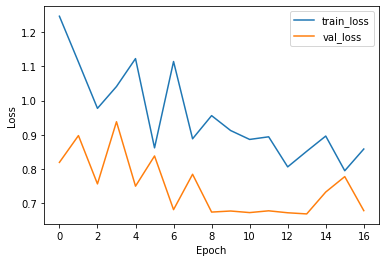

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.6000 - auc_6: 0.5573 - auc_7: 0.7218 - loss: 0.6694 - precision_3: 0.6000 - recall_3: 1.0000
Test Accuracy: 60.00%
Precision: 0.60
Recall: 1.00
AUC-ROC: 0.56
AUC-PR: 0.72
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  8]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50
Precision: 0.60
Recall: 1.00
F1 Score: 0.75
PR AUC: 0.80
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 40.74 seconds
Monkeypox Predictions: 100.00% (20/20)
Non-Monkeypox Predictions: 0.00% (0/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total T

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 input size is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Global Average Pooling
pooled_output = GlobalAveragePooling2D()(inception_output)

# Dense Layers with LeakyReLU activation
x = Dense(512)(pooled_output)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 751ms/step - accuracy: 0.5862 - auc_8: 0.5831 - auc_9: 0.6176 - loss: 0.7758 - precision_4: 0.6179 - recall_4: 0.6415 - val_accuracy: 0.6000 - val_auc_8: 0.4219 - val_auc_9: 0.5350 - val_loss: 0.6882 - val_precision_4: 0.6000 - val_recall_4: 1.0000
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.4830 - auc_8: 0.5809 - auc_9: 0.6239 - loss: 0.8593 - precision_4: 0.5074 - recall_4: 0.5763 - val_accuracy: 0.4500 - val_auc_8: 0.5521 - val_auc_9: 0.7035 - val_loss: 0.7255 - val_precision_4: 1.0000 - val_recall_4: 0.0833
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.4439 - auc_8: 0.4523 - auc_9: 0.5847 - loss: 1.0545 - precision_4: 0.5049 - recall_4: 0.4495 - val_accuracy: 0.6000 - val_auc_8: 0.5729 - val_auc_9: 0.7416 - val_loss: 0.6808 - val_precision_4: 0.6667 - val_recall_4: 0.6667
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.5902 - auc_8: 0.6466 - auc_9: 0.6842 - loss: 0.8976 - precision_4: 0

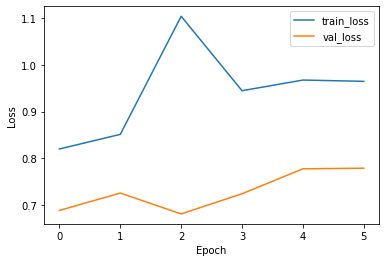

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.6000 - auc_8: 0.5729 - auc_9: 0.7416 - loss: 0.6808 - precision_4: 0.6667 - recall_4: 0.6667
Test Accuracy: 60.00%
Precision: 0.67
Recall: 0.67
AUC-ROC: 0.57
AUC-PR: 0.74
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
Confusion Matrix:
[[4 4]
 [4 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.67      0.67      0.67        12

    accuracy                           0.60        20
   macro avg       0.58      0.58      0.58        20
weighted avg       0.60      0.60      0.60        20

AUC Score: 0.58
Precision: 0.67
Recall: 0.67
F1 Score: 0.67
PR AUC: 0.77
Cohen's Kappa Coefficient: 0.17
Matthews Correlation Coefficient (MCC): 0.17
Balanced Accuracy: 0.58
Time taken: 17.32 seconds
Monkeypox Predictions: 60.00% (12/20)
Non-Monkeypox Predictions: 40.00% (8/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total Ti

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 input size is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Global Average Pooling
pooled_output = GlobalAveragePooling2D()(inception_output)

# Dense Layers with LeakyReLU activation
x = Dense(512)(pooled_output)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 748ms/step - accuracy: 0.5393 - auc_10: 0.5057 - auc_11: 0.5461 - loss: 0.7712 - precision_5: 0.5658 - recall_5: 0.6570 - val_accuracy: 0.5000 - val_auc_10: 0.6510 - val_auc_11: 0.8064 - val_loss: 0.6744 - val_precision_5: 0.5714 - val_recall_5: 0.6667
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.5521 - auc_10: 0.5881 - auc_11: 0.5335 - loss: 0.8742 - precision_5: 0.5107 - recall_5: 0.4858 - val_accuracy: 0.6000 - val_auc_10: 0.4948 - val_auc_11: 0.5787 - val_loss: 0.7742 - val_precision_5: 0.6000 - val_recall_5: 1.0000
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.4878 - auc_10: 0.4332 - auc_11: 0.4697 - loss: 1.1859 - precision_5: 0.5236 - recall_5: 0.5425 - val_accuracy: 0.6000 - val_auc_10: 0.5052 - val_auc_11: 0.5540 - val_loss: 0.6928 - val_precision_5: 0.6000 - val_recall_5: 1.0000
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.5792 - auc_10: 0.5558 - auc_11: 0.6308 - loss: 1.0195 - 

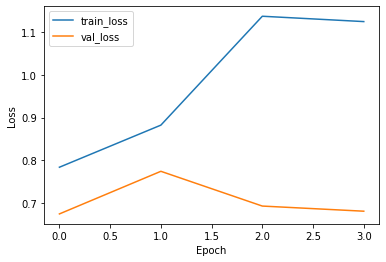

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5000 - auc_10: 0.6510 - auc_11: 0.8064 - loss: 0.6744 - precision_5: 0.5714 - recall_5: 0.6667
Test Accuracy: 50.00%
Precision: 0.57
Recall: 0.67
AUC-ROC: 0.65
AUC-PR: 0.81
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[2 6]
 [4 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.57      0.67      0.62        12

    accuracy                           0.50        20
   macro avg       0.45      0.46      0.45        20
weighted avg       0.48      0.50      0.48        20

AUC Score: 0.46
Precision: 0.57
Recall: 0.67
F1 Score: 0.62
PR AUC: 0.72
Cohen's Kappa Coefficient: -0.09
Matthews Correlation Coefficient (MCC): -0.09
Balanced Accuracy: 0.46
Time taken: 13.21 seconds
Monkeypox Predictions: 70.00% (14/20)
Non-Monkeypox Predictions: 30.00% (6/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total T

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 input size is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Global Average Pooling
pooled_output = GlobalAveragePooling2D()(inception_output)

# Dense Layers with LeakyReLU activation
x = Dense(512)(pooled_output)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Multi-Head Attention

# 50 epochs

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_v3        │ (None, 8, 8,      │ 21,802,784 │ input_layer_21[0… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ inception_v3[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, 1, 2048)   │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 2048)   │  2,099,968 │ reshape_7[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 2048)      │          0 │ multi_head_atten… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 2048)      │          0 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 512)       │  1,049,088 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 512)       │          0 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 1)         │        513 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,952,353 (95.19 MB)

 Trainable params: 3,149,569 (12.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 815ms/step - accuracy: 0.5523 - auc_12: 0.5197 - auc_13: 0.5602 - loss: 0.8366 - precision_6: 0.5810 - recall_6: 0.4158 - val_accuracy: 0.4000 - val_auc_12: 0.5833 - val_auc_13: 0.6483 - val_loss: 0.8143 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 0.4753 - auc_12: 0.5037 - auc_13: 0.5401 - loss: 0.8109 - precision_6: 0.6100 - recall_6: 0.4699 - val_accuracy: 0.4000 - val_auc_12: 0.7083 - val_auc_13: 0.8087 - val_loss: 0.8044 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.4743 - auc_12: 0.4989 - auc_13: 0.5786 - loss: 0.9010 - precision_6: 0.4944 - recall_6: 0.5286 - val_accuracy: 0.4000 - val_auc_12: 0.7969 - val_auc_13: 0.9047 - val_loss: 0.8372 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.4967 - auc_12: 0.5380 - auc_13: 0.59

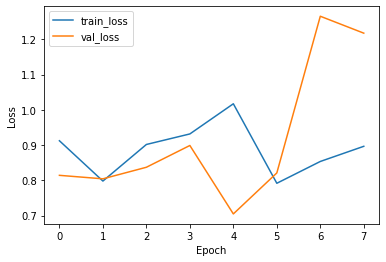

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6000 - auc_12: 0.5052 - auc_13: 0.5791 - loss: 0.7049 - precision_6: 0.6000 - recall_6: 1.0000
Test Accuracy: 60.00%
Precision: 0.60
Recall: 1.00
AUC-ROC: 0.51
AUC-PR: 0.58
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  8]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50
Precision: 0.60
Recall: 1.00
F1 Score: 0.75
PR AUC: 0.80
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 23.58 seconds
Monkeypox Predictions: 100.00% (20/20)
Non-Monkeypox Predictions: 0.00% (0/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Reshape the output for Multi-Head Attention
inception_output_flattened = GlobalAveragePooling2D()(inception_output)
inception_output_reshaped = Reshape((1, inception_output_flattened.shape[1]))(inception_output_flattened)

# Apply Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(inception_output_reshaped, inception_output_reshaped)

# Reshape back for Dense layers
attention_output_flattened = Flatten()(attention_output)

# Add Dense Layers
x = Dropout(0.5)(attention_output_flattened)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_v3        │ (None, 8, 8,      │ 21,802,784 │ input_layer_23[0… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ inception_v3[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 1, 2048)   │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 2048)   │  2,099,968 │ reshape_8[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 2048)      │          0 │ multi_head_atten… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 2048)      │          0 │ flatten_12[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 512)       │  1,049,088 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 512)       │          0 │ dense_25[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1)         │        513 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,952,353 (95.19 MB)

 Trainable params: 3,149,569 (12.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 816ms/step - accuracy: 0.4616 - auc_14: 0.4726 - auc_15: 0.5274 - loss: 1.1721 - precision_7: 0.5560 - recall_7: 0.3400 - val_accuracy: 0.6000 - val_auc_14: 0.3333 - val_auc_15: 0.4971 - val_loss: 0.9582 - val_precision_7: 0.6000 - val_recall_7: 1.0000
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 515ms/step - accuracy: 0.5676 - auc_14: 0.5066 - auc_15: 0.5914 - loss: 0.8645 - precision_7: 0.5827 - recall_7: 0.7992 - val_accuracy: 0.4000 - val_auc_14: 0.5781 - val_auc_15: 0.7176 - val_loss: 1.3273 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 0.4878 - auc_14: 0.5012 - auc_15: 0.5523 - loss: 1.2113 - precision_7: 0.6009 - recall_7: 0.3892 - val_accuracy: 0.6000 - val_auc_14: 0.3542 - val_auc_15: 0.4944 - val_loss: 0.9484 - val_precision_7: 0.6000 - val_recall_7: 1.0000
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.4540 - auc_14: 0.4326 - auc_15: 0.4818 - loss: 1

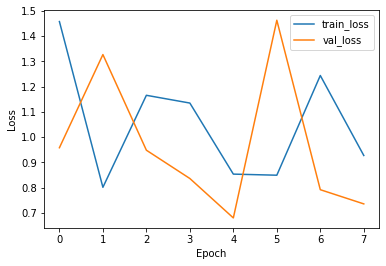

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6000 - auc_14: 0.4167 - auc_15: 0.5826 - loss: 0.6801 - precision_7: 0.6000 - recall_7: 1.0000
Test Accuracy: 60.00%
Precision: 0.60
Recall: 1.00
AUC-ROC: 0.42
AUC-PR: 0.58
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  8]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50
Precision: 0.60
Recall: 1.00
F1 Score: 0.75
PR AUC: 0.80
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 23.47 seconds
Monkeypox Predictions: 100.00% (20/20)
Non-Monkeypox Predictions: 0.00% (0/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Reshape the output for Multi-Head Attention
inception_output_flattened = GlobalAveragePooling2D()(inception_output)
inception_output_reshaped = Reshape((1, inception_output_flattened.shape[1]))(inception_output_flattened)

# Apply Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(inception_output_reshaped, inception_output_reshaped)

# Reshape back for Dense layers
attention_output_flattened = Flatten()(attention_output)

# Add Dense Layers
x = Dropout(0.5)(attention_output_flattened)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_v3        │ (None, 8, 8,      │ 21,802,784 │ input_layer_25[0… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ inception_v3[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 1, 2048)   │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 2048)   │  2,099,968 │ reshape_9[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 2048)      │          0 │ multi_head_atten… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 2048)      │          0 │ flatten_13[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 512)       │  1,049,088 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 512)       │          0 │ dense_27[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 1)         │        513 │ dropout_14[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,952,353 (95.19 MB)

 Trainable params: 3,149,569 (12.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 807ms/step - accuracy: 0.4988 - auc_16: 0.5270 - auc_17: 0.5461 - loss: 0.7799 - precision_8: 0.5272 - recall_8: 0.5386 - val_accuracy: 0.4000 - val_auc_16: 0.5885 - val_auc_17: 0.7492 - val_loss: 1.1592 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step - accuracy: 0.4065 - auc_16: 0.5193 - auc_17: 0.6170 - loss: 1.2489 - precision_8: 0.3812 - recall_8: 0.4264 - val_accuracy: 0.6000 - val_auc_16: 0.4427 - val_auc_17: 0.5278 - val_loss: 0.6750 - val_precision_8: 0.6000 - val_recall_8: 1.0000
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 0.5604 - auc_16: 0.4963 - auc_17: 0.5486 - loss: 1.1626 - precision_8: 0.5911 - recall_8: 0.5960 - val_accuracy: 0.6000 - val_auc_16: 0.4115 - val_auc_17: 0.5302 - val_loss: 0.7335 - val_precision_8: 0.6000 - val_recall_8: 1.0000
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 0.5280 - auc_16: 0.5336 - auc_17: 0.6019 - loss: 1

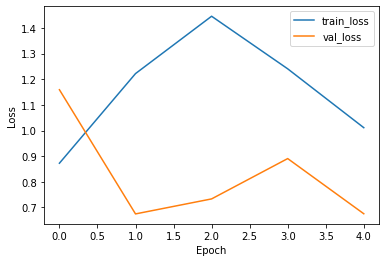

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.6000 - auc_16: 0.4427 - auc_17: 0.5278 - loss: 0.6750 - precision_8: 0.6000 - recall_8: 1.0000
Test Accuracy: 60.00%
Precision: 0.60
Recall: 1.00
AUC-ROC: 0.44
AUC-PR: 0.53
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  8]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50
Precision: 0.60
Recall: 1.00
F1 Score: 0.75
PR AUC: 0.80
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 17.56 seconds
Monkeypox Predictions: 100.00% (20/20)
Non-Monkeypox Predictions: 0.00% (0/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Reshape the output for Multi-Head Attention
inception_output_flattened = GlobalAveragePooling2D()(inception_output)
inception_output_reshaped = Reshape((1, inception_output_flattened.shape[1]))(inception_output_flattened)

# Apply Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(inception_output_reshaped, inception_output_reshaped)

# Reshape back for Dense layers
attention_output_flattened = Flatten()(attention_output)

# Add Dense Layers
x = Dropout(0.5)(attention_output_flattened)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Spatial Dropout

# 50 epochs

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 8, 8, 2048)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,852,385 (87.17 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 760ms/step - accuracy: 0.5673 - auc_18: 0.6098 - auc_19: 0.6515 - loss: 0.8805 - precision_9: 0.5698 - recall_9: 0.5911 - val_accuracy: 0.5000 - val_auc_18: 0.5938 - val_auc_19: 0.6598 - val_loss: 0.6908 - val_precision_9: 0.6667 - val_recall_9: 0.3333
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.4868 - auc_18: 0.5703 - auc_19: 0.5932 - loss: 0.8842 - precision_9: 0.5567 - recall_9: 0.3980 - val_accuracy: 0.6000 - val_auc_18: 0.5833 - val_auc_19: 0.7085 - val_loss: 0.7697 - val_precision_9: 0.6000 - val_recall_9: 1.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.6318 - auc_18: 0.6467 - auc_19: 0.6361 - loss: 0.8077 - precision_9: 0.6391 - recall_9: 0.7417 - val_accuracy: 0.4000 - val_auc_18: 0.6250 - val_auc_19: 0.7196 - val_loss: 0.7212 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.5573 - auc_18: 0.5784 - auc_19: 0.5956 - loss: 0.854

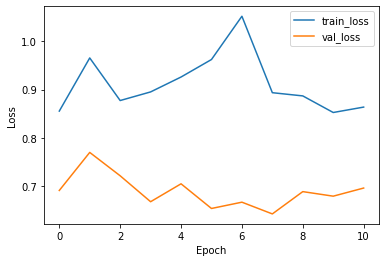

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6000 - auc_18: 0.6823 - auc_19: 0.7517 - loss: 0.6422 - precision_9: 0.6000 - recall_9: 1.0000
Test Accuracy: 60.00%
Precision: 0.60
Recall: 1.00
AUC-ROC: 0.68
AUC-PR: 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  8]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50
Precision: 0.60
Recall: 1.00
F1 Score: 0.75
PR AUC: 0.80
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 28.34 seconds
Monkeypox Predictions: 100.00% (20/20)
Non-Monkeypox Predictions: 0.00% (0/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, SpatialDropout2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 default input is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Apply Spatial Dropout
x = SpatialDropout2D(0.5)(inception_output)

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 8, 8, 2048)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,852,385 (87.17 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 757ms/step - accuracy: 0.5271 - auc_20: 0.4949 - auc_21: 0.5657 - loss: 0.9662 - precision_10: 0.5586 - recall_10: 0.7228 - val_accuracy: 0.4000 - val_auc_20: 0.7969 - val_auc_21: 0.7904 - val_loss: 1.2933 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 467ms/step - accuracy: 0.4663 - auc_20: 0.4593 - auc_21: 0.4989 - loss: 1.1264 - precision_10: 0.4805 - recall_10: 0.3216 - val_accuracy: 0.6000 - val_auc_20: 0.5573 - val_auc_21: 0.6072 - val_loss: 0.9607 - val_precision_10: 0.6000 - val_recall_10: 1.0000
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - accuracy: 0.5605 - auc_20: 0.5797 - auc_21: 0.6028 - loss: 1.0934 - precision_10: 0.5701 - recall_10: 0.8944 - val_accuracy: 0.3500 - val_auc_20: 0.6979 - val_auc_21: 0.6846 - val_loss: 0.7281 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - accuracy: 0.4486 - auc_20: 0.4306 - auc_

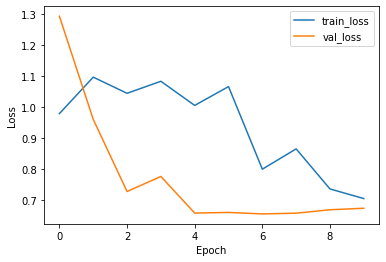

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5500 - auc_20: 0.5833 - auc_21: 0.7067 - loss: 0.6558 - precision_10: 0.5789 - recall_10: 0.9167
Test Accuracy: 55.00%
Precision: 0.58
Recall: 0.92
AUC-ROC: 0.58
AUC-PR: 0.71
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  8]
 [ 1 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.58      0.92      0.71        12

    accuracy                           0.55        20
   macro avg       0.29      0.46      0.35        20
weighted avg       0.35      0.55      0.43        20

AUC Score: 0.46
Precision: 0.58
Recall: 0.92
F1 Score: 0.71
PR AUC: 0.77
Cohen's Kappa Coefficient: -0.10
Matthews Correlation Coefficient (MCC): -0.19
Balanced Accuracy: 0.46
Time taken: 27.46 seconds
Monkeypox Predictions: 95.00% (19/20)
Non-Monkeypox Predictions: 5.00% (1/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
To

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, SpatialDropout2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 default input is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Apply Spatial Dropout
x = SpatialDropout2D(0.5)(inception_output)

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 8, 8, 2048)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,852,385 (87.17 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 768ms/step - accuracy: 0.5527 - auc_22: 0.6037 - auc_23: 0.6372 - loss: 0.8778 - precision_11: 0.5916 - recall_11: 0.6010 - val_accuracy: 0.4000 - val_auc_22: 0.4583 - val_auc_23: 0.6142 - val_loss: 0.9178 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.4974 - auc_22: 0.5009 - auc_23: 0.5444 - loss: 0.9831 - precision_11: 0.5542 - recall_11: 0.2590 - val_accuracy: 0.6000 - val_auc_22: 0.4479 - val_auc_23: 0.6441 - val_loss: 0.8369 - val_precision_11: 0.6000 - val_recall_11: 1.0000
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.4698 - auc_22: 0.3630 - auc_23: 0.4226 - loss: 1.3650 - precision_11: 0.4951 - recall_11: 0.8630 - val_accuracy: 0.5500 - val_auc_22: 0.4427 - val_auc_23: 0.6039 - val_loss: 0.6918 - val_precision_11: 0.5789 - val_recall_11: 0.9167
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 0.4363 - auc_22: 0.4032 - auc_23: 0.49

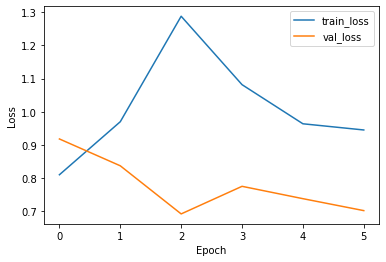

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.5500 - auc_22: 0.4427 - auc_23: 0.6039 - loss: 0.6918 - precision_11: 0.5789 - recall_11: 0.9167
Test Accuracy: 55.00%
Precision: 0.58
Recall: 0.92
AUC-ROC: 0.44
AUC-PR: 0.60
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  8]
 [ 1 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.58      0.92      0.71        12

    accuracy                           0.55        20
   macro avg       0.29      0.46      0.35        20
weighted avg       0.35      0.55      0.43        20

AUC Score: 0.46
Precision: 0.58
Recall: 0.92
F1 Score: 0.71
PR AUC: 0.77
Cohen's Kappa Coefficient: -0.10
Matthews Correlation Coefficient (MCC): -0.19
Balanced Accuracy: 0.46
Time taken: 19.48 seconds
Monkeypox Predictions: 95.00% (19/20)
Non-Monkeypox Predictions: 5.00% (1/20)
The model predicted more Monkeypox cases than non-Monkeypox cases.
To

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, SpatialDropout2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 default input is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(299, 299, 3))
inception_output = inception_base(inputs)

# Apply Spatial Dropout
x = SpatialDropout2D(0.5)(inception_output)

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# L2 Regularization

# 50 epochs

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,912,673 (339.17 MB)

 Trainable params: 67,109,889 (256.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5247 - auc_24: 0.5044 - auc_25: 0.5633 - loss: 21.1029 - precision_12: 0.5727 - recall_12: 0.5575 - val_accuracy: 0.6000 - val_auc_24: 0.5000 - val_auc_25: 0.6000 - val_loss: 18.7417 - val_precision_12: 0.6000 - val_recall_12: 1.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1000ms/step - accuracy: 0.5283 - auc_24: 0.5412 - auc_25: 0.5307 - loss: 15.7214 - precision_12: 0.5317 - recall_12: 0.7506 - val_accuracy: 0.3500 - val_auc_24: 0.3281 - val_auc_25: 0.4866 - val_loss: 5.9650 - val_precision_12: 0.4444 - val_recall_12: 0.3333
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 981ms/step - accuracy: 0.7071 - auc_24: 0.7196 - auc_25: 0.7265 - loss: 9.0819 - precision_12: 0.7633 - recall_12: 0.6802 - val_accuracy: 0.4500 - val_auc_24: 0.4427 - val_auc_25: 0.5516 - val_loss: 6.7825 - val_precision_12: 0.5455 - val_recall_12: 0.5000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 980ms/step - accuracy: 0.6988 - auc_24: 0.7055 - auc_25: 0.7300 - loss: 

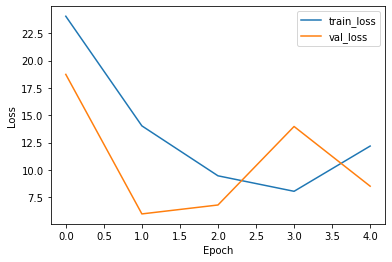

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.3500 - auc_24: 0.3281 - auc_25: 0.4866 - loss: 5.9650 - precision_12: 0.4444 - recall_12: 0.3333
Test Accuracy: 35.00%
Precision: 0.44
Recall: 0.33
AUC-ROC: 0.33
AUC-PR: 0.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[3 5]
 [8 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.38      0.32         8
           1       0.44      0.33      0.38        12

    accuracy                           0.35        20
   macro avg       0.36      0.35      0.35        20
weighted avg       0.38      0.35      0.35        20

AUC Score: 0.35
Precision: 0.44
Recall: 0.33
F1 Score: 0.38
PR AUC: 0.59
Cohen's Kappa Coefficient: -0.27
Matthews Correlation Coefficient (MCC): -0.29
Balanced Accuracy: 0.35
Time taken: 25.90 seconds
Monkeypox Predictions: 45.00% (9/20)
Non-Monkeypox Predictions: 55.00% (11/20)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Update input shape to (299, 299)
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base with L2 regularization
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,912,673 (339.17 MB)

 Trainable params: 67,109,889 (256.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4665 - auc_26: 0.4959 - auc_27: 0.5381 - loss: 45.0126 - precision_13: 0.4828 - recall_13: 0.5327 - val_accuracy: 0.4000 - val_auc_26: 0.5000 - val_auc_27: 0.6000 - val_loss: 77.7669 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 986ms/step - accuracy: 0.4677 - auc_26: 0.5018 - auc_27: 0.5584 - loss: 59.8597 - precision_13: 0.4333 - recall_13: 0.0410 - val_accuracy: 0.6000 - val_auc_26: 0.5000 - val_auc_27: 0.6000 - val_loss: 35.6113 - val_precision_13: 0.6000 - val_recall_13: 1.0000
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5712 - auc_26: 0.4959 - auc_27: 0.5744 - loss: 33.8555 - precision_13: 0.5743 - recall_13: 0.9829 - val_accuracy: 0.4000 - val_auc_26: 0.5000 - val_auc_27: 0.6000 - val_loss: 22.7143 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4816 - auc_26: 0.5321 - auc_27:

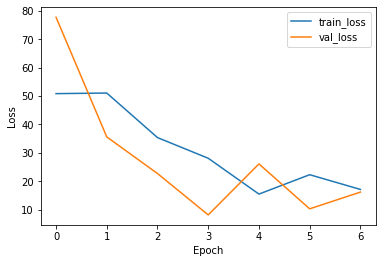

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.4000 - auc_26: 0.5000 - auc_27: 0.6000 - loss: 8.1310 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00
Test Accuracy: 40.00%
Precision: 0.00
Recall: 0.00
AUC-ROC: 0.50
AUC-PR: 0.60
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix:
[[ 8  0]
 [12  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       0.00      0.00      0.00        12

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20

AUC Score: 0.50
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
PR AUC: 0.80
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 35.17 seconds
Monkeypox Predictions: 0.00% (0/20)
Non-Monkeypox Predictions: 100.00% (20/20)
The model predicted more non-Monkeypox cases than Monkeypox ca

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Update input shape to (299, 299)
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base with L2 regularization
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

2024-11-13 16:52:24.096616: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 16:52:24.100983: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 16:52:24.142206: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 16:52:24.181650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731496944.215374    3822 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731496944.22

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,912,673 (339.17 MB)

 Trainable params: 67,109,889 (256.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7040 - auc: 0.7292 - auc_1: 0.6894 - loss: 10.5354 - precision: 0.6885 - recall: 0.7336 - val_accuracy: 0.8833 - val_auc: 0.8989 - val_auc_1: 0.8491 - val_loss: 3.8663 - val_precision: 0.8571 - val_recall: 0.9153
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9157 - auc: 0.9414 - auc_1: 0.9325 - loss: 2.9868 - precision: 0.9235 - recall: 0.9111 - val_accuracy: 0.8917 - val_auc: 0.9128 - val_auc_1: 0.9425 - val_loss: 3.3598 - val_precision: 0.9894 - val_recall: 0.7881
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9130 - auc: 0.9436 - auc_1: 0.9379 - loss: 2.6542 - precision: 0.9242 - recall: 0.8966 - val_accuracy: 0.9000 - val_auc: 0.9332 - val_auc_1: 0.9255 - val_loss: 2.5995 - val_precision: 0.9123 - val_recall: 0.8814
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9591 - auc: 0.9752 - auc_1: 0.9682 - loss: 2.0609 - precision: 0.9595 - recall: 0.9625 - val_accuracy: 

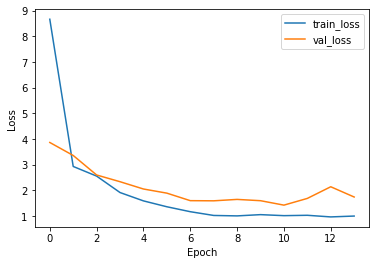

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.9123 - auc: 0.9552 - auc_1: 0.9086 - loss: 1.3885 - precision: 0.8573 - recall: 0.9595
Test Accuracy: 91.67%
Precision: 0.88
Recall: 0.96
AUC-ROC: 0.96
AUC-PR: 0.93
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step
Confusion Matrix:
[[107  15]
 [  5 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       122
           1       0.88      0.96      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92
Precision: 0.88
Recall: 0.96
F1 Score: 0.92
PR AUC: 0.93
Cohen's Kappa Coefficient: 0.83
Matthews Correlation Coefficient (MCC): 0.84
Balanced Accuracy: 0.92
Time taken: 512.45 seconds
Monkeypox Predictions: 53.33% (128/240)
Non-Monkeypox Predictions: 46.67% (112/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.


In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # Update input shape to (299, 299)
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base with L2 regularization
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# DenseNet Blocks

# 50 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Changed to InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the InceptionV3 model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


NameError: name 'X_train' is not defined

# 150 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Changed to InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the InceptionV3 model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


NameError: name 'X_train' is not defined

# 200 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Changed to InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the InceptionV3 model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


NameError: name 'X_train' is not defined

# MixUP Augmentation

# 50 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Change to InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the InceptionV3 model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 input size is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Function for Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha <= 0:
        return x, y
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y

# Custom generator for Mixup
class MixupDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size=32, alpha=0.2):
        self.x = x
        self.y = y
        self.batch_size = batch_size
        self.alpha = alpha
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, idx):
        batch_indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = self.x[batch_indexes]
        batch_y = self.y[batch_indexes]

        # Apply Mixup augmentation
        mixed_x, mixed_y = mixup_data(batch_x, batch_y, alpha=self.alpha)

        return mixed_x, mixed_y

# Instantiate the data generator
train_generator = MixupDataGenerator(X_train_resized, y_train, batch_size=32, alpha=0.2)

# Train the model with early stopping and Mixup data generator
history = model.fit(train_generator, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


NameError: name 'X_train' is not defined

# 150 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Change to InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the InceptionV3 model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 input size is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Function for Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha <= 0:
        return x, y
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y

# Custom generator for Mixup
class MixupDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size=32, alpha=0.2):
        self.x = x
        self.y = y
        self.batch_size = batch_size
        self.alpha = alpha
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, idx):
        batch_indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = self.x[batch_indexes]
        batch_y = self.y[batch_indexes]

        # Apply Mixup augmentation
        mixed_x, mixed_y = mixup_data(batch_x, batch_y, alpha=self.alpha)

        return mixed_x, mixed_y

# Instantiate the data generator
train_generator = MixupDataGenerator(X_train_resized, y_train, batch_size=32, alpha=0.2)

# Train the model with early stopping and Mixup data generator
history = model.fit(train_generator, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


NameError: name 'X_train' is not defined

# 200 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3  # Change to InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the InceptionV3 model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])  # InceptionV3 input size is 299x299
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained InceptionV3 model without the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base InceptionV3 model
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model on top of the InceptionV3 base
model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Function for Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha <= 0:
        return x, y
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y

# Custom generator for Mixup
class MixupDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size=32, alpha=0.2):
        self.x = x
        self.y = y
        self.batch_size = batch_size
        self.alpha = alpha
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, idx):
        batch_indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = self.x[batch_indexes]
        batch_y = self.y[batch_indexes]

        # Apply Mixup augmentation
        mixed_x, mixed_y = mixup_data(batch_x, batch_y, alpha=self.alpha)

        return mixed_x, mixed_y

# Instantiate the data generator
train_generator = MixupDataGenerator(X_train_resized, y_train, batch_size=32, alpha=0.2)

# Train the model with early stopping and Mixup data generator
history = model.fit(train_generator, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


NameError: name 'X_train' is not defined